In [71]:
import os
from pathlib import Path

from dqr.util.preprocess import load_letor

In [2]:
letor_path = Path("../../MQ2008-list/Fold1/train.txt")
df = load_letor(letor_path)

# df = load_letor(letor_path)


Done with 60000 lines
Done with 120000 lines
Done with 180000 lines
Done with 240000 lines
Done with 300000 lines
Done with 360000 lines
Done with 420000 lines
Done with 480000 lines
Done with 540000 lines


In [11]:
df.head()

,1,qid,rank,doc_id,2,3,4,5,6,7,...,37,38,39,40,41,42,43,44,45,46
539317,0.199049,15925,1362,GX015-93-9287729,0.090909,0.5,0.0,0.199577,0.0,0.0,...,0.819446,0.898365,0.973129,0.905888,0.250,0.063158,0.0,0.000534,0.000675,0.0
539318,0.138159,15925,1361,GX039-10-0258489,0.090909,0.0,0.0,0.138291,0.0,0.0,...,0.871066,0.941121,0.998494,0.941966,0.250,0.057895,0.0,0.000023,0.000338,0.0
539319,0.171180,15925,1360,GX061-61-5124799,0.000000,0.0,0.0,0.171180,0.0,0.0,...,0.848084,0.912135,0.977855,0.912432,0.250,0.089474,0.0,0.000518,0.000338,0.0
539320,0.150575,15925,1359,GX254-82-0329970,0.000000,0.0,0.0,0.150575,0.0,0.0,...,0.847055,0.919493,0.980464,0.919286,0.250,0.089474,0.0,0.000528,0.000675,0.0
539321,0.383833,15925,1358,GX256-68-6674364,0.000000,0.0,0.0,0.383833,0.0,0.0,...,0.805499,0.936584,0.993030,0.918746,0.125,0.047368,0.0,0.000263,0.000675,0.0


In [4]:
# lines = []
# with open(letor_path) as f:
#     lines = [line for line in f.readlines()]

In [ ]:
# lines[0]

In [15]:
import pandas as pd
from tqdm.notebook import tqdm

letor_path = Path("../../istella-letor/full/train.txt")

def load_istella_letor(filepath: Path, cutoff: int = 10_000) -> pd.DataFrame:
    observations = []
    lens = []
    with open(filepath) as f:
        for line in tqdm(f.readlines()[:cutoff]):
            obs = {}
            vals = line.strip("\n").split()
            obs["relevance_label"] = int(vals[0])
            obs["qid"] = int(vals[1].split(":")[1])
            for val in vals[2:]:
                feat, val_ = val.split(":")
                obs[feat] = float(val_)
            observations.append(obs)
            lens.append(len(obs))
    unique_lens = set(lens)
    assert len(unique_lens) == 1
    df = pd.DataFrame.from_records(observations)
    return df

df = load_istella_letor(letor_path)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [19]:
df["relevance_label"].unique()

array([0, 1, 3, 4, 2])

## Exploring losses file

In [21]:
with open("../outputs/Mon Oct 21 11:17:14 2024/losses.txt") as f:
    losses = f.readlines()
    train_losses = eval(losses[1])
    val_losses = eval(losses[4])

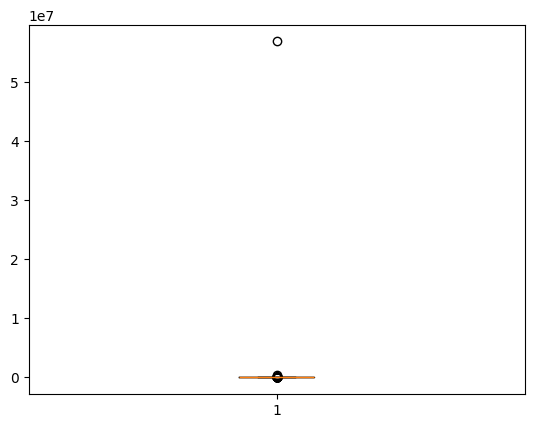

In [30]:
import matplotlib.pyplot as plt
import numpy as np


# filtered = train_losses[:811] + train_losses[812:]
# plt.hist(filtered)
plt.boxplot(train_losses)
plt.show()

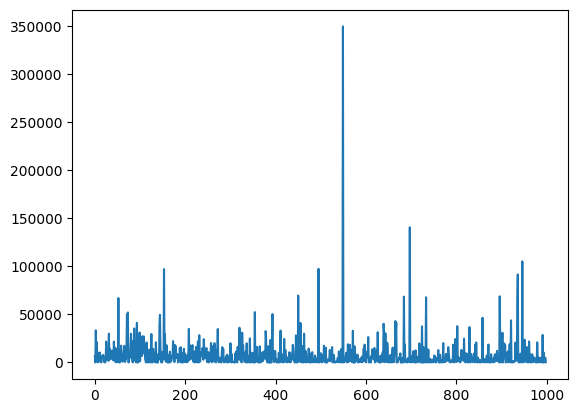

In [33]:
filtered = list(filter(lambda x: x < 1e7, train_losses))
plt.plot(filtered)
plt.show()

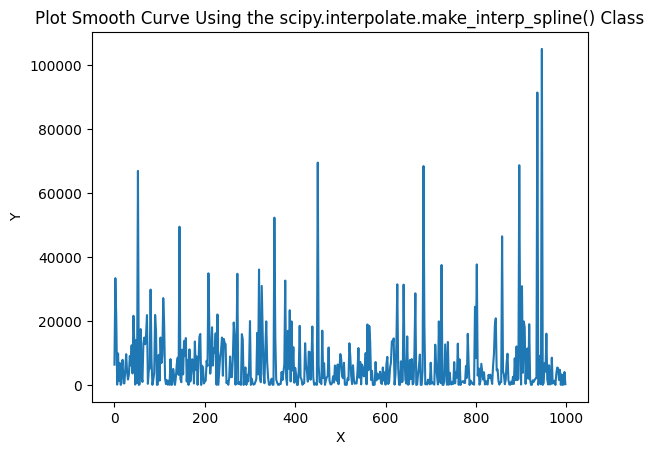

In [35]:
from scipy.interpolate import make_interp_spline

x = np.array([i for i in range(len(filtered))])
y = np.array(filtered)
X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [45]:
import pandas as pd

rolling = pd.Series(train_losses).rolling(10, min_periods=1)

From paper:

> At first glance, this plot paints the picture of a stagnated model that isn’t learning. After manipulating the data, we’re able to better visualize the model’s behavior by observing a moving average of $log_{10}$ (applied to smooth out the large range of values) loss instead of plain MSE loss.

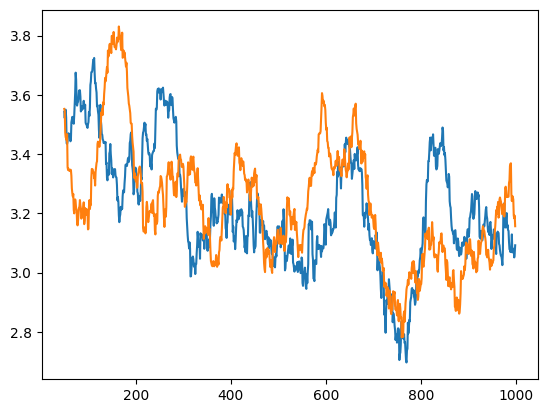

In [65]:
train_log_losses = pd.Series(train_losses).apply(np.log10).rolling(50).mean()
val_log_losses = pd.Series(val_losses).apply(np.log10).rolling(50).mean()

plt.plot(train_log_losses)
plt.plot(val_log_losses)
plt.show()

In [66]:
with open("../outputs/2024-10-23_10:04:20.421379__seed_4/losses.txt") as f:
    losses = f.readlines()
    train_losses = eval(losses[1])
    val_losses = eval(losses[4])


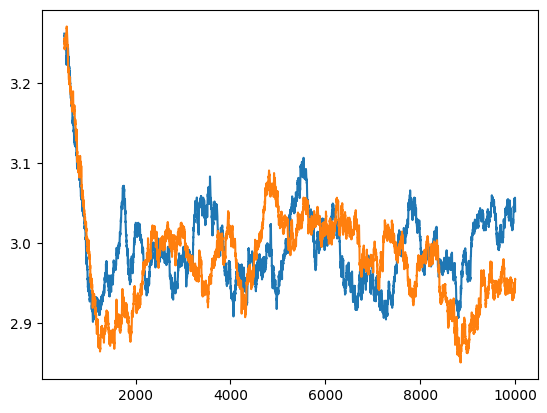

In [70]:
train_log_losses = pd.Series(train_losses).apply(np.log10).rolling(500).mean()
val_log_losses = pd.Series(val_losses).apply(np.log10).rolling(500).mean()

plt.plot(train_log_losses)
plt.plot(val_log_losses)
plt.show()
